Worked with Magnus Andreas Giverin

# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [2]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model
from torchviz import make_dot

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [52]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random

# Set the random seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


X_train = train[['x0', 'x1']].values
y_train = train['y'].values
X_test = test[['x0', 'x1']].values
y_test = test['y'].values

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

total_epochs = 100
warmup_epochs = 10

def lr_scheduler(epoch):
    initial_lr = 1e-6  
    max_lr = 0.01     
    min_lr = 1e-5      
    if epoch < warmup_epochs:
        lr = initial_lr + (max_lr - initial_lr) * (epoch / warmup_epochs)
    else:
        decay_epochs = total_epochs - warmup_epochs
        epoch_in_decay = epoch - warmup_epochs
        cosine_decay = 0.5 * (1 + np.cos(np.pi * epoch_in_decay / decay_epochs))
        lr = min_lr + (max_lr - min_lr) * cosine_decay
    return lr

callbacks = [
    tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
]

# Train the model
history = model.fit(X_train, y_train, epochs=total_epochs, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=0)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy}")

C:\Users\Jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2775 
Test Accuracy: 0.9200000166893005


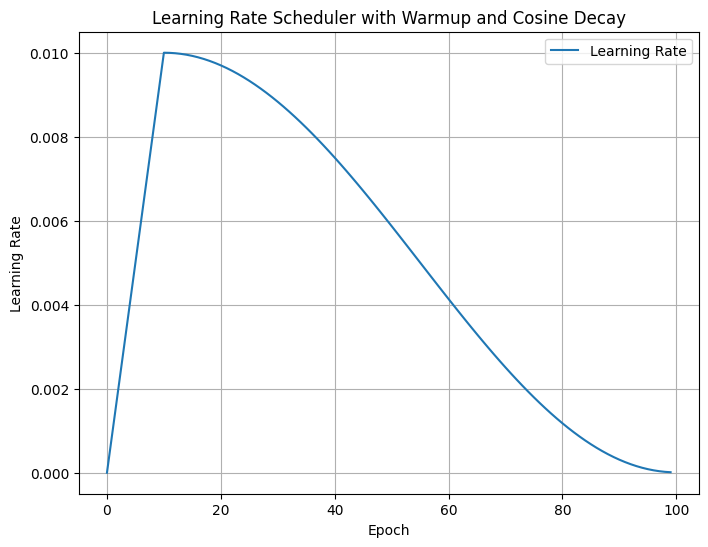

In [40]:
epochs = np.arange(0,total_epochs)

learning_rates = [lr_scheduler(epoch) for epoch in epochs]

# Plot the learning rates over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, learning_rates, label="Learning Rate")
plt.title("Learning Rate Scheduler with Warmup and Cosine Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


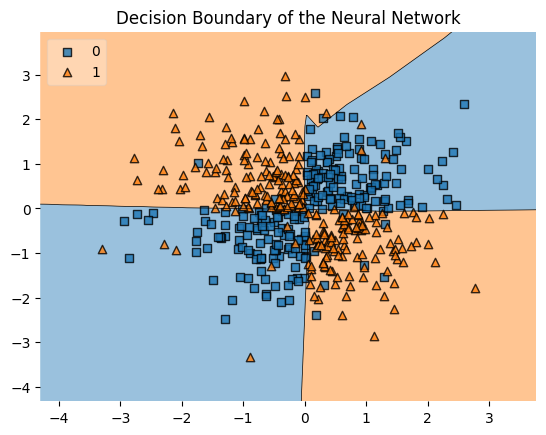

In [53]:
# xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
#                      np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))

# grid = np.c_[xx.ravel(), yy.ravel()]
# preds = model.predict(grid).reshape(xx.shape)

# plt.contourf(xx, yy, preds, alpha=0.6)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_train, edgecolor='k')
# plt.title("Decision Boundary")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.astype(np.int_), clf=model, legend=2)
plt.title('Decision Boundary of the Neural Network')
plt.show()

The decision boundary is plotted over, and the code beneath visualizes the 'very pretty' network architecture :P

In [54]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_442 (Dense)               │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_443 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_444 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_445 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_446 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_447 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_448 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_449 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_450 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_451 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_452 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_453 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_454 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,337 (5.23 KB)

 Trainable params: 445 (1.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 892 (3.49 KB)

 - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.

I chose the AdamW optimizer for this specific task. This is because AdamW is very good with datasets that have a lot of noise, which ours indeed does have. AdamW works best with complex models, and a neural network is quite complex, atleast I think so. SGD is usually better if the hyperparameters are fine-tuned for it, but if this is not the case it will usually underperform, which is why I did not choose it. If the model was quite simple however, and not so computationally heavy, I would have gone with SGD.

- Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?

The learning rate dynamics is visualized right under the training of the model. As we can tell it starts of with a brief warmup period until the decay begins. This method is quite good for avoiding unstable updates early in the training. So the warmup lets the model be a bit more comfortable at the peak, and learning rate can thus decrease. If I remove the learning rate scheduling, I get a severely lower score, so I can say without doubt that it did indeed improve the performance.  

### Ablation Study

1. **Basic Model**:
   - The basic model is the current model with 13 layers and varying from 8 and 4 neurons per layer, `ReLU` activations for all but the last, and `AdamW` optimizer with learning rate scheduling.
   - **Test Accuracy**: *92.0%* 

2. **Remove Learning Rate Scheduling**:
   - Remove the warmup and cosine decay scheduling and use a fixed learning rate.
   - **Test Accuracy**: *89.8%* 
   - **Observation**: Accuracy dropped a tiny bit, but this could actually mean that this solution might end up being better with some tweaking.

3. **Change Optimizer to SGD**:
   - Replace `AdamW` optimizer with traditional `SGD`.
   - **Test Accuracy**: *87.8%*.
   - **Observation**: This means that `AdamW` is SLIGHTLY better than `SGD`, but it could also mean I was wrong in assuming AdamW is the only option for this task, as `SGD` clearly has some say in the matter with a good score as well.

4. **Reduce Number of Layers**:
   - Reduce the depth of the network from 11 hidden layers to 5 hidden layers.
   - **Test Accuracy**: *88.2%*.
   - **Observation**: Considering I put 11 hidden just for fun this tells me that I probably overdid it, but the learning experience sure got better with 11 though.

5. **Reduce Number of Neurons**:
   - Reduce the number of neurons per layer from 64 to 32.
   - **Test Accuracy**: *90.6%*.
   - **Observation**: Again, I did overdo it on purpose and this is confirmation that I did :P

6. **Change Activation Functions**:
   - Replace `ReLU` with a different activation function, such as `SoftMax`.
   - **Test Accuracy**: *48.2%*.
   - **Observation**: This is just a test that ReLU actually does something, which this CLEARLY shows. SoftMax is not usually meant for hidden layers, and this is good proof of it. 

7. **Dont Scale Data**:
   - As title says, dont scale the data with StandardScaler() before fitting.
   - **Test Accuracy**: *88.6%*.
   - **Observation**: I did this out of habit, and it seems to do something, but only helps by a small margin. 


# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


C:\Users\Jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Jakob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Jakob\AppData\Local\Temp\ipykernel_14924\122954666.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_X[:, 0], umap_X[:, 1], s=15, cmap='Spectral')


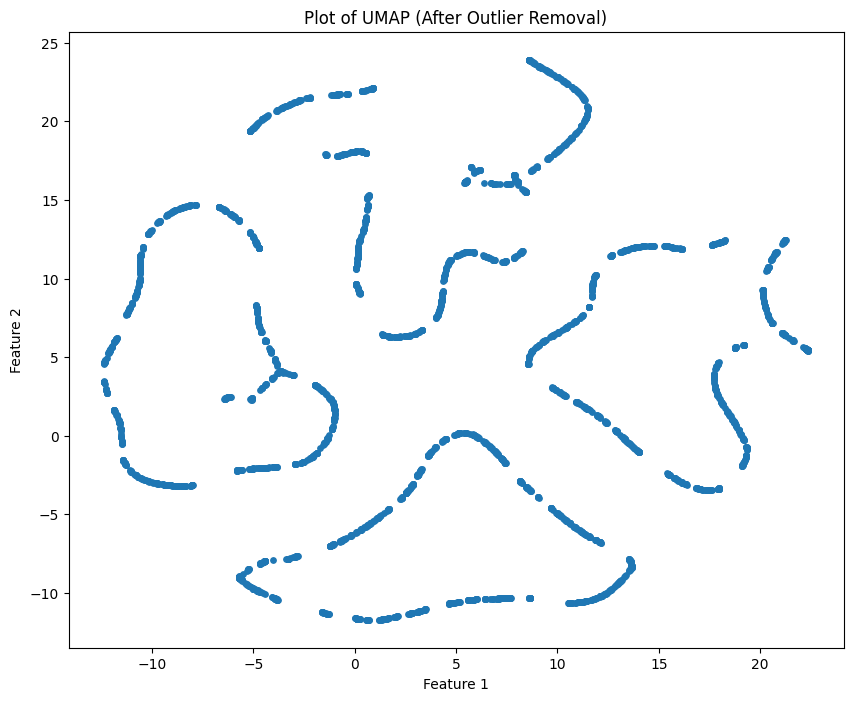

In [2]:
import pandas as pd
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Create the 'ID' column by resetting the index
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

features = data.drop(columns=['ID'])

#UMAP for Further Dimensionality Reduction on Cleaned Data
reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.01, random_state=42)
umap_X = reducer.fit_transform(features)

#UMAP plotting
plt.figure(figsize=(10, 8))
plt.scatter(umap_X[:, 0], umap_X[:, 1], s=15, cmap='Spectral')
plt.title('Plot of UMAP (After Outlier Removal)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

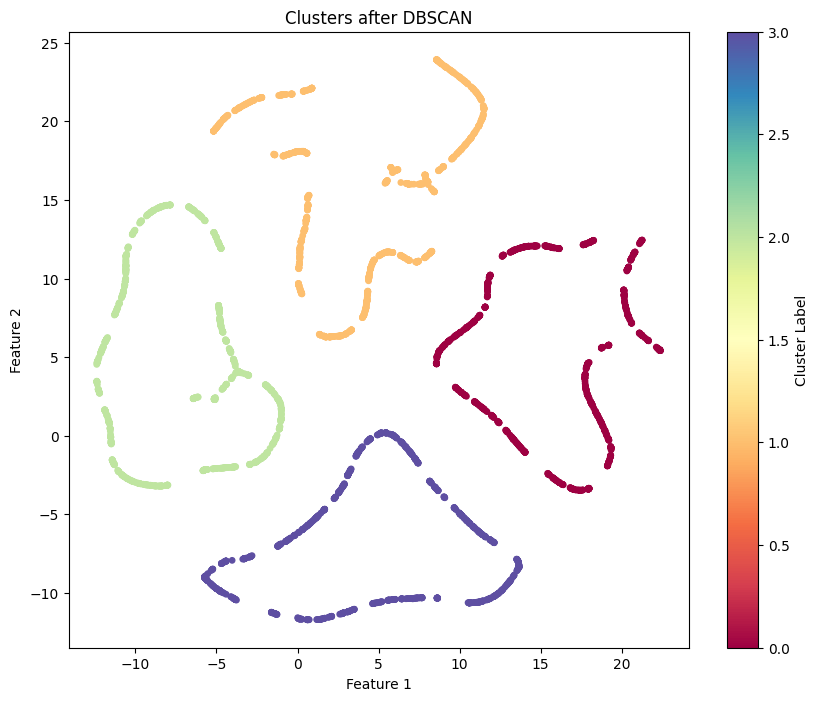

In [235]:
#DBSCAN Clustering
epsilon = 3.8
min_smpl = 100
dbscan = DBSCAN(eps=epsilon, min_samples=min_smpl)
dbscan_labels = dbscan.fit_predict(umap_X)
data['cluster'] = dbscan_labels

#Plot Clusters
plt.figure(figsize=(10, 8))
plt.scatter(umap_X[:, 0], umap_X[:, 1], c=dbscan_labels, s=15, cmap='Spectral')
plt.title('Clusters after DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

#Kaggle Submission
submission = data[['ID', 'cluster']].copy()
submission.rename(columns={'cluster': 'cluster_dbscan'}, inplace=True)
submission.to_csv('submission.csv', index=False)

# Dimensionality Reduction and Clustering Approach

- **Dimensionality Reduction**:  
  So, for dimensionality reduction, I used **UMAP**. I found that UMAP helped me determine the correct number of clusters, mainly because it’s great at preserving both local and global structures, which gives a good visual separation. Compared to other dimensionality reduction methods like **PCA** and **t-SNE**, I felt that UMAP worked better for this dataset since it balances well between maintaining the overall shape of the data and the local neighborhood detail.

  **PCA** is more about linear transformations, which can sometimes miss out on complex relationships in the data. It’s good for simplifying the data, but often doesn’t show as much meaningful separation between clusters unless the dataset already has some linear patterns. **t-SNE**, on the other hand, is amazing for local clustering and visualizing high-dimensional data, but I found it less useful for understanding global structures, and it's also pretty slow on larger datasets.

  UMAP, with its tunable parameters like `n_neighbors` and `min_dist`, gave me a lot of flexibility to try to pull apart different groupings in the data, making it easier to understand how many distinct clusters there might be.

- **Clustering Approach**:  
  I ended up using **DBSCAN** for the clustering step. I chose this mainly because I wanted to find clusters of different shapes and densities, and I didn’t want to have to specify the number of clusters in advance. For the hyperparameters, I set `eps` to **3.8** and `min_samples` to **100**. Finding these values was a bit of trial and error, but setting `eps` high enough to capture the appropriate neighborhood and choosing `min_samples` to control for noise worked well.

  Compared to **KMeans**, which requires you to set a fixed number of clusters, **DBSCAN** has the advantage of automatically figuring out the number of clusters based on density. KMeans would force clusters even if they weren’t meaningful, which didn't fit the data well in my case (especially since the clusters here don’t seem to have uniform sizes or shapes). **DBSCAN** also labels noise points separately, which I think is helpful for datasets like this, where there might be some outliers that don’t fit well into any cluster.


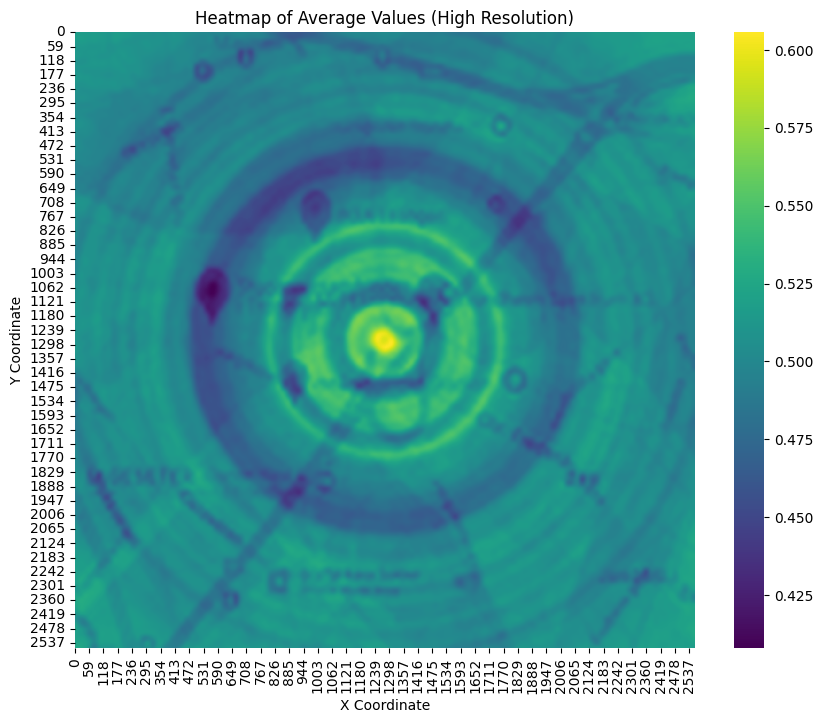

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import zoom

submission_df = pd.read_csv('submission.csv')
data_df = pd.read_csv('unsupervised_data.csv') 

data_columns = [col for col in data_df.columns]

# Check if any columns were found
if len(data_columns) == 0:
    raise ValueError("No relevant data columns were found in the dataset.")

# Sort the columns based on their number if they have one, otherwise keep the order
try:
    sorted_columns = sorted(data_columns, key=lambda x: int(x.split('_')[1]))
except ValueError:
    sorted_columns = data_columns

data_sorted_df = data_df[sorted_columns]
average_values = data_sorted_df.mean(axis=0).values

# Check the size of average_values
if average_values.size != 16384:
    raise ValueError(f"Expected 16384 columns, but got {average_values.size}. Check column filtering or data loading.")

# Reshape the 1D array of 16384 values into a 2D grid of 128x128
reshaped_grid = average_values.reshape(128, 128)
high_res_grid = zoom(reshaped_grid, zoom=20)  # Increase the resolution by zooming in (20 times larger)

# Plot the grid as a heatmap with higher resolution
plt.figure(figsize=(10, 8))
sns.heatmap(high_res_grid, cmap='viridis', cbar=True)
plt.title('Heatmap of Average Values (High Resolution)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

The above image clearly shows that the raw data is a 'morphed' Google Maps image. We can see the four markers here in somewhat of a square form. The four markers is a HUGE hint that the four clusters we have determined in task 1 are indeed the four server locations just formatted as a picture, now we just need to reassemble the picture...

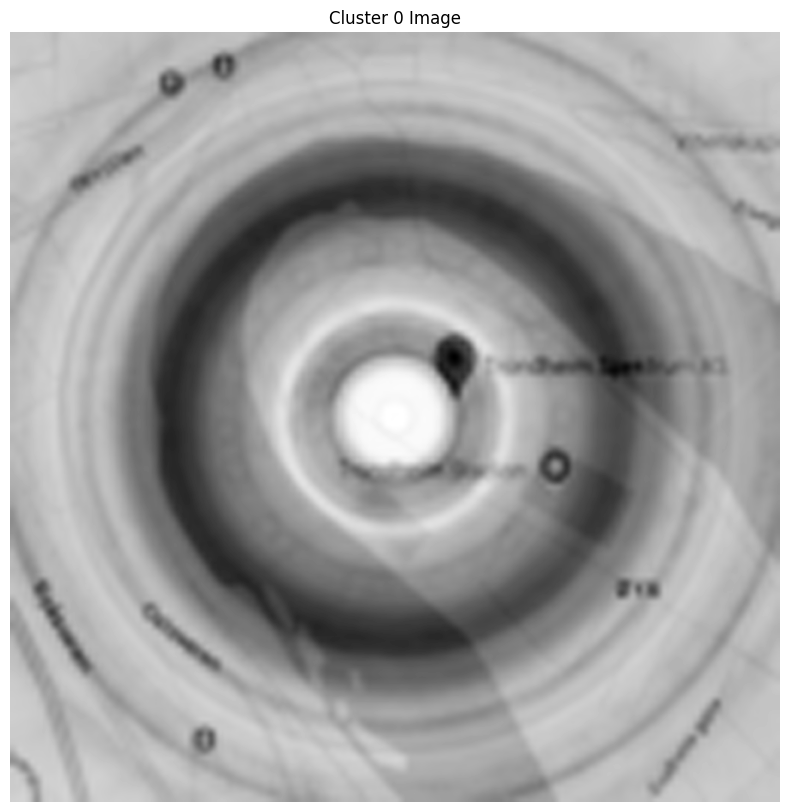

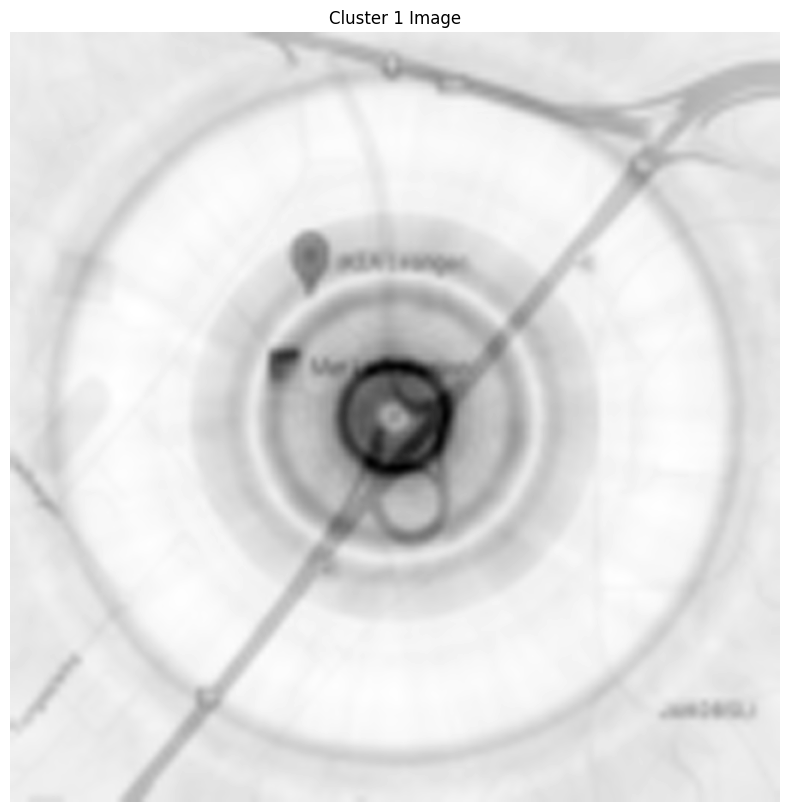

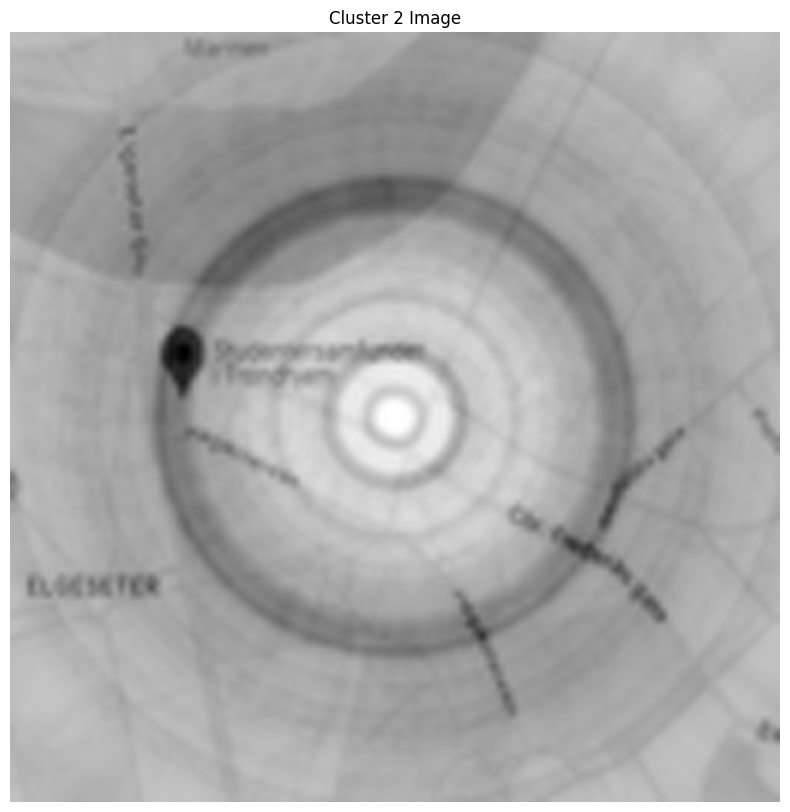

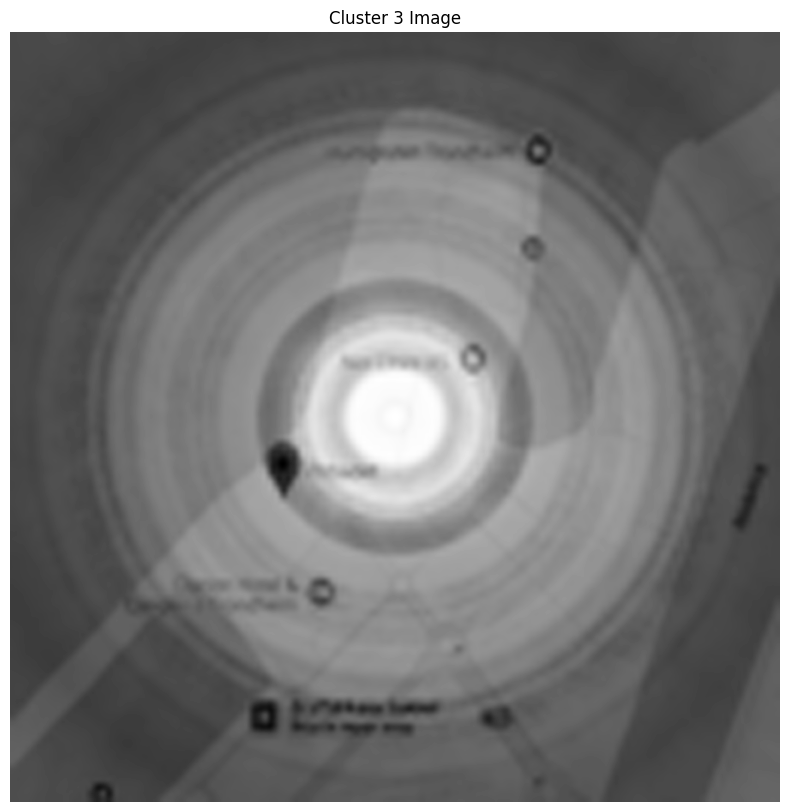

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import cv2

# Load the submission data
submission_df = pd.read_csv('submission.csv')
unsupervised_data_df = pd.read_csv('unsupervised_data.csv')

sorted_columns = sorted(unsupervised_data_df.columns, key=lambda x: int(x.split('_')[1]))
unsupervised_data_df = unsupervised_data_df[sorted_columns]

# Create four lists to store data for each cluster
cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []

for idx, cluster in enumerate(submission_df['cluster']):
    if cluster == 0:
        cluster_0.append(unsupervised_data_df.iloc[idx].values)
    elif cluster == 1:
        cluster_1.append(unsupervised_data_df.iloc[idx].values)
    elif cluster == 2:
        cluster_2.append(unsupervised_data_df.iloc[idx].values)
    elif cluster == 3:
        cluster_3.append(unsupervised_data_df.iloc[idx].values)

# Convert lists to numpy arrays
cluster_0 = np.array(cluster_0)
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)
cluster_3 = np.array(cluster_3)

# Function to create an image from the cluster data and upscale it
def create_cluster_image(cluster_data, title, upscale_factor=4):
    # Calculate the average for each column across all rows to represent each pixel value
    average_values = np.mean(cluster_data, axis=0)
    side_length = int(np.sqrt(average_values.size))
    reshaped_grid = average_values.reshape(side_length, side_length)
    upscaled_grid = cv2.resize(reshaped_grid, (side_length * upscale_factor, side_length * upscale_factor), interpolation=cv2.INTER_CUBIC)
    
    # Plot the upscaled image
    plt.figure(figsize=(10, 10))
    plt.imshow(upscaled_grid, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Create upscaled images for each cluster
create_cluster_image(cluster_0, 'Cluster 0 Image', upscale_factor=8)
create_cluster_image(cluster_1, 'Cluster 1 Image', upscale_factor=8)
create_cluster_image(cluster_2, 'Cluster 2 Image', upscale_factor=8)
create_cluster_image(cluster_3, 'Cluster 3 Image', upscale_factor=8)

# Server Locations

I determined that the server locations are at four spots in Trondheim: Trondheim Spektrum, IKEA Leangen, Samfundet, and Pirbadet. I identified these locations by clustering the dataset into four groups. I used the `cluster` column from `submission.csv` to label the rows and split the data accordingly. For each cluster, I took the average of all the feature values and organized them into a 128x128 grid. After that, I upscaled these grids to improve visibility and plotted them as heatmaps. Based on those heatmaps, I compared the patterns to actual places in Trondheim, which led me to those four spots. It involved a mix of analysis and some estimation based on what I could recognize. Not perfect, but it worked for this purpose.

# Data Type Analysis

The hidden data type in the dataset appears to be continuous values, likely numbers between 0 and 1. This is important because it influences how I extract features for clustering. With continuous data, I used the distance-based clustering method known as DBSCAN, which is effective for identifying clusters of varying densities. Since the data was continuous, I used averaging to represent each grid point for the clusters. And because I wasn't dealing with categories, it made sense to use dimensionality reduction algorithms like UMAP, which work well with continuous data and help preserve important patterns. This also explains why some dimensionality reduction methods worked better—continuous data tends to maintain relationships more clearly when reduced, which made UMAP effective at capturing the patterns here.
